In [955]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

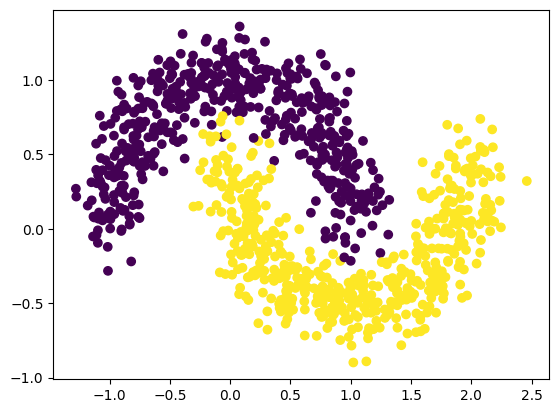

In [956]:
X, y = datasets.make_moons(n_samples=1000, noise=0.15, random_state=170)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [1007]:
n = 1000
din = 2
dout = 2

W = np.random.uniform(np.min(X), np.max(X), size=(n, din))
W = W[np.argsort(np.sum(W, axis=1)), :]
L = np.random.uniform(0, 1, size=(n, dout))
L = L[np.argsort(np.sum(L, axis=1)), :]

In [1008]:
x = X[0][np.newaxis, :]
bmu_idx = np.argmin(np.linalg.norm(x - W, axis=1))
bmu = W[bmu_idx, :]

In [1009]:
nn = np.exp(-np.linalg.norm(W - bmu, axis=1)**2 / 0.2**2)

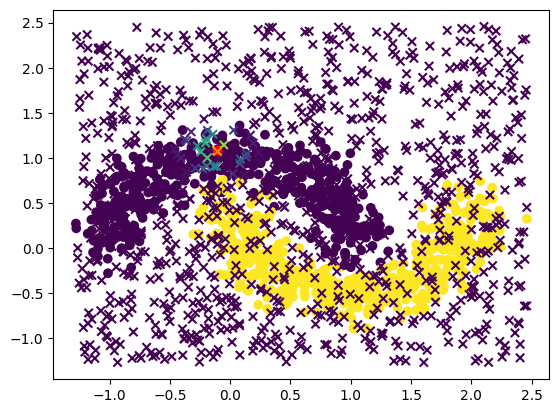

In [1010]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(W[:,0], W[:,1], marker="x", c=nn)
plt.scatter(*x[0], color="red")
plt.scatter(*bmu, color="darkorange", marker="x")

In [1019]:
def find_bmu(x, W):
    return np.argmin(np.linalg.norm(np.atleast_2d(x) - W, axis=1))

In [1020]:
def neighbours_map(c, W, sigma):
    return np.exp(-np.linalg.norm(W - c, axis=1)**2 / (2*sigma**2))

In [1021]:
def update(c, W, nn, lr):
    nn = np.repeat(nn[:, np.newaxis], W.shape[1], axis=1)
    return W - lr * nn * (W - c)

In [1029]:
n = 500
lr=0.5
din = 2
dout = 2
sigma=0.1

W = np.random.uniform(np.min(X), np.max(X), size=(n, din))
W = W[np.argsort(np.sum(W, axis=1)), :]
L = np.random.uniform(0, 1, size=(n, dout))
L = L[np.argsort(np.sum(L, axis=1)), :]

W_history = []
nn_history = []
bmu_history = []
for e in range(100):
    for x in X:
        c_idx = find_bmu(x, W)
        c = W[c_idx]
        nn = neighbours_map(L[c_idx], L, sigma)
        W = update(x, W, nn, lr)

        W_history.append(W)
        nn_history.append(nn)
        bmu_history.append(bmu)

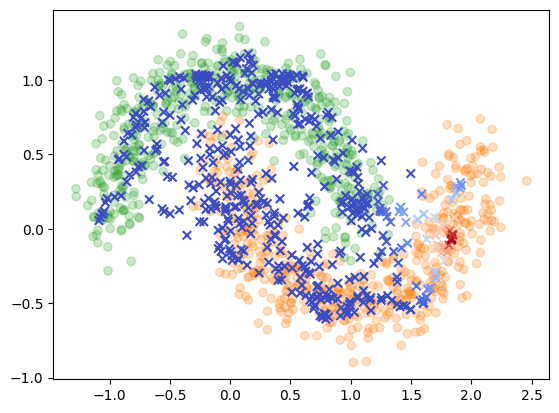

In [1030]:
t = 99999
plt.scatter(X[:, 0], X[:, 1], c=np.where(y > 0, "C1", "C2"), alpha=0.25)
plt.scatter(W_history[t][:,0], W_history[t][:,1], marker="x", c=nn_history[t],cmap="coolwarm")

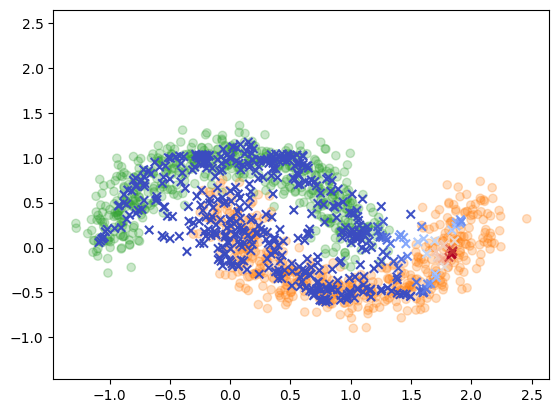

In [1031]:
import matplotlib.animation as animation
from functools import partial

fig, ax = plt.subplots()

W, nn, bmu = W_history[0], nn_history[0], bmu_history[0]

x_sc = ax.scatter(X[:, 0], X[:, 1], c=np.where(y > 0, "C1", "C2"), alpha=0.25)
som_sc = ax.scatter(W[:,0], W[:,1], marker="x", c=nn, cmap="coolwarm")


def update(i, W_history, nn_history, bmu_history):
    W, nn, bmu = W_history[i], nn_history[i], bmu_history[i]

    som_sc.set_offsets(W)
    som_sc.set_array(nn)
    
    return som_sc,

ani = animation.FuncAnimation(
    fig, 
    partial(update, W_history=W_history, nn_history=nn_history, bmu_history=bmu_history), 
    frames=np.arange(10000),
    blit=True
)

ani.save(filename="./som.html", writer="html")

In [817]:
def gaussian(x, mu, sigma):
    return 1 / sigma*np.sqrt(2*np.pi) * np.exp(-(x - mu)**2/(2*sigma**2))

In [896]:
def tonotopic(n, m, b, width):
    s = width * np.sqrt(n)
    
    mu = np.tile(np.linspace(0, n, m)[:, np.newaxis], (1, n))
    xi = np.tile(np.arange(0, n), (m, 1))
    
    max_bound = gaussian(3*s, 0.0, s)
    
    w = gaussian(xi, mu, s)
    w = np.where(w < max_bound, 0.0, w)
    w = np.exp(b*w)/np.sum(np.exp(b*w), axis=0)
    return w

In [951]:
w = tonotopic(128, 1000, 100, 1)

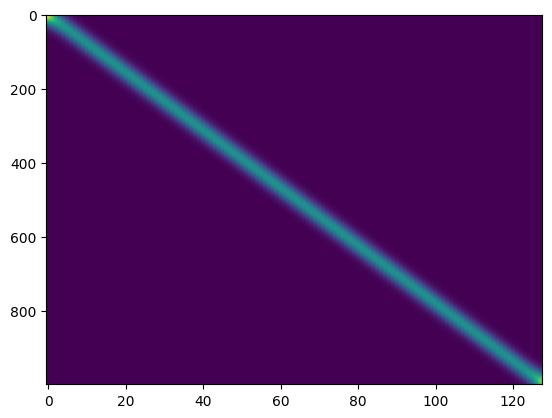

In [952]:
plt.imshow(w, aspect="auto")

In [953]:
np.random.multinomial(1000, w[:, 0])

array([36, 38, 40, 29, 37, 41, 56, 56, 36, 35, 31, 39, 30, 32, 31, 23, 21,
       30, 26, 27, 24, 26, 18, 22, 17, 16, 12, 14, 16, 17,  8, 13, 10, 12,
       12,  7,  9,  6,  8,  1,  3,  3,  6,  5,  3,  3,  1,  2,  1,  1,  1,
        0,  2,  2,  3,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0